# PMYCについて

- 親変数 parent variable 他の変数に影響を与える変数
- 子変数 child variable 他の変数から影響を受ける変数

ある変数は親変数と子変数の両方になれる。
PMYCは親変数と子変数にアクセスできる。

In [1]:
import pymc as pm

lambda_ = pm.Exponential("poisson_param", 1)

data_generator = pm.Poisson("data_gnerator", lambda_)
data_plus_one = data_generator + 1

print("Children of lambda_")
print(lambda_.children)

print("Parents of data generator")
print(data_generator.parents)

print("Childern of data generator")
print(data_generator.children)


Children of lambda_
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_gnerator' at 0x00000227DB899978>}
Parents of data generator
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'poisson_param' at 0x00000227D972F9B0>}
Childern of data generator
{<pymc.PyMCObjects.Deterministic '(data_gnerator_add_1)' at 0x00000227D972FA58>}


全てのPYMC変数は、valueプロパティを持っている。

- stochastic変数（確率的）　親変数が分かっていても値がランダムな物。○○分布
- deterministic変数（決定的）　親関数が分かっていればその値が決まる変数。


In [2]:
print("lambda_value =", lambda_.value)
print("data_generator value = ", data_generator.value)
print("data_plus_one value = ",  data_plus_one.value)

lambda_value = 1.050642282259113
data_generator value =  0
data_plus_one value =  1


## モデルに観測を組み込む

In [3]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
figsize(12.5, 4)

In [4]:
lambda_1 = pm.Exponential("lambda_1", 1)
lambda_2 = pm.Exponential("lambda_2", 1)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)
data = np.array([10, 25, 15, 20, 35])
n_count_data = len(data)
obs = pm.Poisson("obs", lambda_, value=data, observed=True)

@pm.deterministic
def lambda_(tau=tau, lamba_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1 
    out[tau:] = lambda_2
    return out


(array([  9.24931005e-01,   7.89197650e-01,   7.16110459e-01,
          6.05219549e-01,   5.23131472e-01,   4.83887610e-01,
          3.96038967e-01,   3.64355850e-01,   3.12150713e-01,
          2.73986958e-01,   2.44464053e-01,   2.08460511e-01,
          1.75337252e-01,   1.54455197e-01,   1.37893568e-01,
          1.23852186e-01,   9.00088561e-02,   9.18090332e-02,
          8.02878997e-02,   6.80466952e-02,   5.04049594e-02,
          5.00449240e-02,   4.39243218e-02,   4.21241447e-02,
          3.16831174e-02,   3.27632236e-02,   2.16021255e-02,
          2.30422672e-02,   1.29612753e-02,   1.80017712e-02,
          1.44014170e-02,   1.22412044e-02,   1.18811690e-02,
          1.08010627e-02,   3.60035424e-03,   9.72095646e-03,
          7.20070849e-03,   3.60035424e-03,   5.76056679e-03,
          6.84067306e-03,   4.32042509e-03,   2.16021255e-03,
          2.88028340e-03,   2.52024797e-03,   1.80017712e-03,
          1.44014170e-03,   1.80017712e-03,   1.44014170e-03,
        

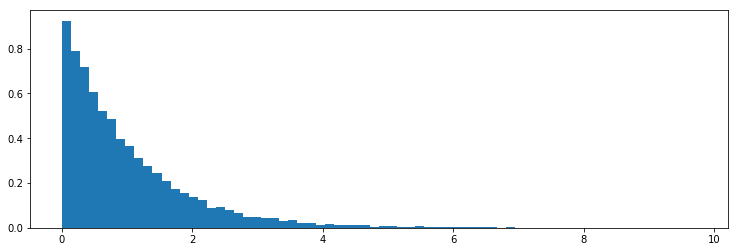

In [5]:
samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

stochastic変数を固定値にしてモデルに組み込む

In [6]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2,tau])

## 同じ物語、異なる結末


(0, 80)

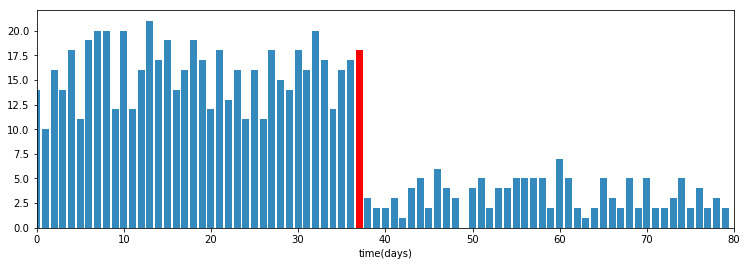

In [7]:
# 1. ユーザーの揺るまいが変化する変化点をDiscreteUniformからサンプリングする
tau = pm.rdiscrete_uniform(0, 80)

#2 指数分布をλ1, λ2からサンプリングする。
alpha= 1.0/20
lambda_1, lambda_2 = pm.rexponential(alpha, 2)

#3 日付tauで振り分け
lambda_ = np.r_[lambda_1 * np.ones(tau), lambda_2 * np.ones(80 - tau)]

#4 Poiでサンプリング
data = pm.rpoisson(lambda_)

#5 plot
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau-1], color ='r')
plt.xlabel("time(days)")
plt.xlim([0,80])